<h2>Importing libraries</h2>
Now we're going to add some libraries for feature extraction

In [26]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#Keras

<h2>Dataset creating</h2>
CSV file's header:

In [28]:
header = 'filename chroma_stft melspectrogram contrast flatness tonnetz tempogram rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
#header += ' label'
header = header.split()

Let's extract some features

It's a long process - don't run it without strong necessary

(file <i>dataset.csv</i> has already included

In [30]:
file = open('dataset_advanced.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

    for filename in os.listdir(f'./Set1/WAV'):
        songname = f'./Set1/WAV/{filename}'
        y, sr = librosa.load(songname, mono=True)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        flatness = librosa.feature.spectral_flatness(y=y)
        tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
        tempogram = librosa.feature.tempogram(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(melspectrogram)} {np.mean(contrast)} {np.mean(flatness)} {np.mean(tonnetz)} {np.mean(tempogram)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'

        file = open('dataset_advanced.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())


001.wav
002.wav
003.wav
004.wav
005.wav
006.wav
007.wav
008.wav
009.wav
010.wav
011.wav
012.wav
013.wav
014.wav
015.wav
016.wav
017.wav
018.wav
019.wav
020.wav
021.wav
022.wav
023.wav
024.wav
025.wav
026.wav
027.wav
028.wav
029.wav
030.wav
031.wav
032.wav
033.wav
034.wav
035.wav
036.wav
037.wav
038.wav
039.wav
040.wav
041.wav
042.wav
043.wav
044.wav
045.wav
046.wav
047.wav
048.wav
049.wav
050.wav
051.wav
052.wav
053.wav
054.wav
055.wav
056.wav
057.wav
058.wav
059.wav
060.wav
061.wav
062.wav
063.wav
064.wav
065.wav
066.wav
067.wav
068.wav
069.wav
070.wav
071.wav
072.wav
073.wav
074.wav
075.wav
076.wav
077.wav
078.wav
079.wav
080.wav
081.wav
082.wav
083.wav
084.wav
085.wav
086.wav
087.wav
088.wav
089.wav
090.wav
091.wav
092.wav
093.wav
094.wav
095.wav
096.wav
097.wav
098.wav
099.wav
100.wav
101.wav
102.wav
103.wav
104.wav
105.wav
106.wav
107.wav
108.wav
109.wav
110.wav
111.wav
112.wav
113.wav
114.wav
115.wav
116.wav
117.wav
118.wav
119.wav
120.wav
121.wav
122.wav
123.wav
124.wav
125.wav


<h2>Preprocessing dataset</h2>

In [34]:
songname = f'./Set1/WAV/001.wav'
y, sr = librosa.load(songname, mono=True)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
flatness = librosa.feature.spectral_flatness(y=y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
tempogram = librosa.feature.tempogram(y=y, sr=sr)
rmse = librosa.feature.rms(y=y)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(melspectrogram)} {np.mean(contrast)} {np.mean(flatness)} {np.mean(tonnetz)} {np.mean(tempogram)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
for e in mfcc:
    to_append += f' {np.mean(e)}'
to_append

'360.wav 0.2936825752258301 1.774574637413025 23.223774113933278 0.003971126861870289 -0.010570212727577036 0.15549831151615023 0.08911171555519104 1767.3911880115347 1796.3165075464324 3337.9115084134614 0.1090264423076923 -158.8653106689453 119.88406372070312 -34.78178024291992 35.453556060791016 -0.4711099863052368 13.612735748291016 -13.087447166442871 -2.130436420440674 -5.94347620010376 1.2900221347808838 -4.343043804168701 8.76695442199707 -2.563502788543701 2.6661150455474854 -6.926175594329834 -1.8208589553833008 -3.1124794483184814 -0.40902090072631836 -0.6334847211837769 -3.9117178916931152'

In [36]:
librosaData = pd.read_csv('dataset_advanced.csv')
filenames = librosaData['filename']
librosaData.drop(['filename'],axis=1, inplace=True)
librosaData.head()

scalerLibrosa = MinMaxScaler()
librosa_scaled = scalerLibrosa.fit_transform(X=librosaData)
print(librosa_scaled)

[[0.29926651 0.14133597 0.4757166  ... 0.36500164 0.43707843 0.26305436]
 [0.41483731 0.07690762 0.39306139 ... 0.36184949 0.35707246 0.25367657]
 [0.2735686  0.15089286 0.35964005 ... 0.29598113 0.37759518 0.28601648]
 ...
 [0.46097794 0.00267165 0.46161462 ... 0.46856052 0.45728931 0.38224898]
 [0.34460025 0.00451842 0.50586806 ... 0.38210133 0.34405289 0.27723581]
 [0.11556431 0.01042511 0.68807307 ... 0.69541127 0.59639437 0.3171378 ]]


<h2>Clustering into groups</h2>

In [37]:
n_clusters = 5
clusters = KMeans(n_clusters=n_clusters, random_state=0).fit(librosa_scaled)
clusters.labels_

array([3, 1, 0, 3, 3, 1, 0, 4, 3, 3, 3, 1, 2, 3, 0, 4, 3, 1, 3, 3, 0, 3,
       0, 0, 3, 1, 2, 3, 1, 4, 0, 1, 1, 0, 4, 0, 0, 3, 1, 3, 1, 0, 4, 0,
       0, 0, 4, 1, 1, 1, 4, 3, 0, 1, 0, 0, 0, 3, 1, 3, 3, 0, 1, 4, 1, 1,
       0, 1, 0, 0, 4, 1, 4, 0, 0, 4, 3, 3, 0, 1, 1, 0, 3, 4, 0, 1, 1, 4,
       4, 2, 2, 3, 0, 4, 2, 0, 2, 0, 0, 4, 0, 3, 2, 3, 0, 4, 4, 3, 2, 2,
       3, 4, 2, 3, 0, 2, 0, 0, 1, 4, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 0,
       3, 3, 3, 2, 0, 3, 3, 2, 0, 2, 3, 4, 0, 4, 0, 0, 0, 0, 1, 1, 3, 2,
       4, 2, 4, 2, 2, 3, 4, 3, 1, 3, 3, 1, 2, 3, 2, 3, 4, 2, 2, 0, 0, 4,
       0, 1, 4, 0, 3, 0, 0, 3, 0, 1, 3, 0, 3, 1, 3, 3, 3, 0, 4, 3, 0, 3,
       3, 3, 0, 3, 1, 0, 0, 3, 3, 3, 0, 0, 2, 2, 0, 3, 1, 0, 2, 2, 2, 0,
       2, 0, 3, 2, 0, 2, 3, 0, 2, 2, 0, 2, 4, 0, 0, 4, 0, 3, 2, 0, 2, 3,
       2, 1, 2, 1, 2, 0, 2, 3, 2, 1, 3, 2, 2, 0, 2, 3, 3, 2, 2, 1, 0, 3,
       3, 3, 2, 2, 2, 0, 1, 4, 4, 1, 0, 0, 1, 1, 0, 1, 0, 1, 4, 0, 3, 0,
       4, 0, 1, 4, 0, 4, 1, 1, 4, 1, 1, 1, 1, 4, 2,

<h2>Decreasing feature size for visualisation</h2>

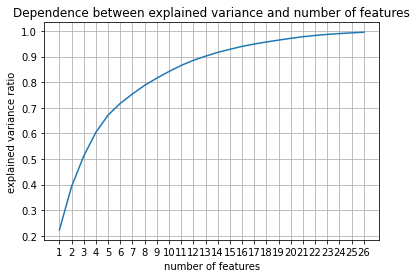

In [38]:
pca = PCA(n_components=3)

plotGroups = pca.fit_transform(librosa_scaled)
centers = pca.transform(clusters.cluster_centers_)
#print(pca.explained_variance_ratio_)

expVar = []
for i in range(1, 27):
    pca1 = PCA(n_components=i)
    pca1.fit_transform(librosa_scaled)
    expVar.append(pca1.explained_variance_ratio_.sum())
plt.plot(range(1, 27), expVar)
plt.xticks(range(1,27))
plt.xlabel('number of features')
plt.ylabel('explained variance ratio')
plt.title('Dependence between explained variance and number of features')
plt.grid(True)

<h2>2d visualisation</h2>

Text(0.5, 1.0, 'created clusters')

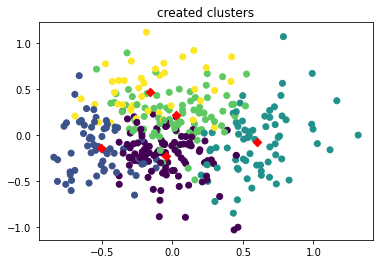

In [39]:
plt.scatter(plotGroups[:,0], plotGroups[:,1], c=clusters.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color = 'red')
plt.title('created clusters')

<h2>3d visualisation</h2>

In [40]:
#Make Plotly figure
import plotly
import plotly.graph_objs as go

fig1 = go.Scatter3d(x=plotGroups[:,0],
                    y=plotGroups[:,1],
                    z=plotGroups[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=5,
                                color=clusters.labels_,
                                #colorscale = 'HSV',
                                line=dict (width=1)),
                    text=filenames,
                    line=dict (width=5),
                    mode='markers')

fig2 = go.Scatter3d(x=centers[:,0],
                    y=centers[:,1],
                    z=centers[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=8,
                                color=list(range(1,n_clusters+1)),
                                #colorscale = 'IceFire',
                                line=dict(width=10)),
                    text=list(range(1,n_clusters+1)),

                    mode='markers')
#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="1 feature"),
                                yaxis=dict(title="2 feature"),
                                zaxis=dict(title="3 feature")),)

#Plot and save html
plotly.offline.plot({"data": [fig1, fig2],
                     "layout": mylayout},
                     auto_open=True,
                     filename="3DPlot.html")



'3DPlot.html'

<h2>Correlation between pre-annotated values and cluster's labels</h2

In [ ]:
#encoding words into numbers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

pre_annotated = pd.read_csv('set1_tracklist.csv')
annotated_classes = encoder.fit_transform(pre_annotated['Emotion'])

np.corrcoef(annotated_classes, clusters.labels_)

As we can see there is a very weak correlation between pre-annotated values and calculated cluster's classes

As we can see there is a very weak correlation between pre-annotated values and calculated cluster's classes

In [24]:
#Make Plotly figure
import plotly
import plotly.graph_objs as go

fig1 = go.Scatter3d(x=plotGroups[:,0],
                    y=plotGroups[:,1],
                    z=plotGroups[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=5,
                                color=clusters.labels_,
                                #colorscale = 'HSV',
                                line=dict (width=1)),
                    text=filenames,
                    line=dict (width=5),
                    mode='markers')

fig2 = go.Scatter3d(x=centers[:,0],
                    y=centers[:,1],
                    z=centers[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=8,
                                color=list(range(1,n_clusters+1)),
                                #colorscale = 'IceFire',
                                line=dict(width=10)),
                    text=list(range(1,n_clusters+1)),

                    mode='markers')
#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="1 feature"),
                                yaxis=dict(title="2 feature"),
                                zaxis=dict(title="3 feature")),)

#Plot and save html
plotly.offline.plot({"data": [fig1, fig2],
                     "layout": mylayout},
                     auto_open=True,
                     filename="3DPlot.html")



'3DPlot.html'

<h2>Correlation between pre-annotated values and cluster's labels</h2

In [14]:
#encoding words into numbers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

pre_annotated = pd.read_csv('set1_tracklist.csv')
annotated_classes = encoder.fit_transform(pre_annotated['Emotion'])

np.corrcoef(annotated_classes, clusters.labels_)

array([[1.       , 0.0805609],
       [0.0805609, 1.       ]])

As we can see there is a very weak correlation between pre-annotated values and calculated cluster's classes